# Day 2

Today, we will start using nf-core pipelines to find differentially abundant genes in our dataset. 
We are using data from the following paper: https://www.nature.com/articles/s41593-023-01350-3#Sec10

1. Please take some time to read through the paper and understand their approach, hypotheses and goals.

What was the objective of the study?

To study the effect of opioid (oxycodone) exposure and subsequent withdrawel on weight gain and other physiological responses, as well as gene expression levels in mice (specifically in mice with prolonged spare nerve injury).

What do the conditions mean?

oxy: chronic oxycodone injections


sal: saline control

What do the genotypes mean?

SNI: spare nerve injury


Sham: sham control

Imagine you are the bioinformatician in the group who conducted this study. They hand you the raw files and ask you to analyze them.

What would you do?

Which groups would you compare to each other?

Please also mention which outcome you would expect to see from each comparison.

First, I would compare the results of the chronic oxycodone groups with the saline control and the results of the SNI groups with the sham control. Here, I would expect differing observations for control and condition/genotype for at least some of the measures. After that, I would look at the impact of the condition on the genotype (or vice versa), how does the same genotype behave for the same condition, how does the same condition affect the results for different phenotypes and stuff like that. For those comparison, many of the observed elements might stay the same.

Your group gave you a very suboptimal excel sheet (conditions_runs_oxy_project.xlsx) to get the information you need for each run they uploaded to the SRA.<br>
So, instead of directly diving into downloading the data and starting the analysis, you first need to sort the lazy table.<br>
Use Python and Pandas to get the table into a more sensible order.<br>
Then, perform some overview analysis and plot the results
1. How many samples do you have per condition?
2. How many samples do you have per genotype?
3. How often do you have each condition per genotype?

In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [7]:
data=pd.read_excel('conditions_runs_oxy_project.xlsx')
data.rename(columns={'Run': 'Sample'}, inplace=True)
data['condition: Sal']=data['condition: Sal'].notna()
data['Genotype: SNI']=data['Genotype: SNI'].notna()
data['Condition'] = np.where(data['condition: Sal'] == True, 'Sal', 'Oxy')
data['Genotype'] = np.where(data['Genotype: SNI'] == True, 'SNI', 'Sham')
data=data[['Sample', 'Condition', 'Genotype']]
data

,Sample,Condition,Genotype
0,SRR23195505,Sal,SNI
1,SRR23195506,Oxy,Sham
2,SRR23195507,Sal,Sham
3,SRR23195508,Oxy,SNI
4,SRR23195509,Oxy,SNI
5,SRR23195510,Sal,SNI
6,SRR23195511,Oxy,Sham
7,SRR23195512,Sal,Sham
8,SRR23195513,Sal,SNI
9,SRR23195514,Oxy,Sham


In [8]:
import matplotlib.pyplot as plt

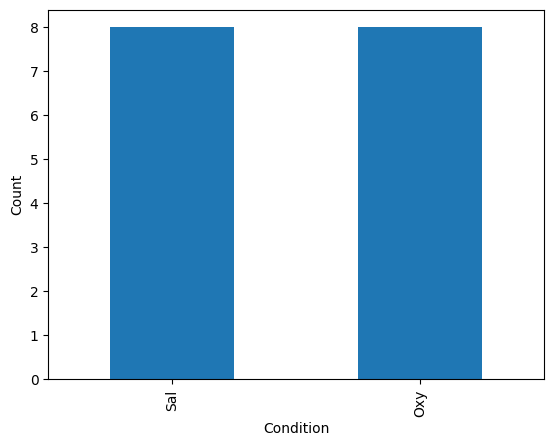

In [9]:
condition_counts = data['Condition'].value_counts()
condition_counts.plot(kind='bar')

plt.xlabel('Condition')
plt.ylabel('Count')

plt.show()


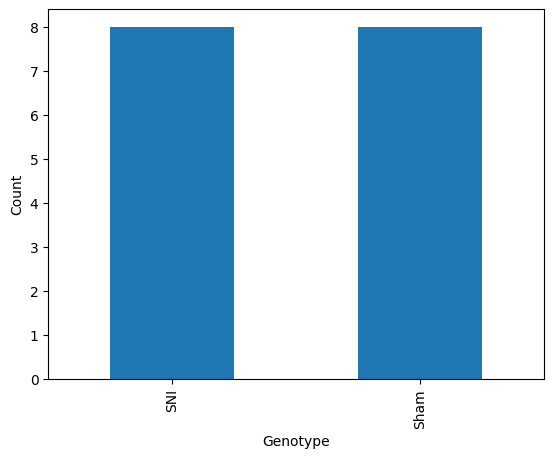

In [10]:
genotype_counts = data['Genotype'].value_counts()
genotype_counts.plot(kind='bar')

plt.xlabel('Genotype')
plt.ylabel('Count')

plt.show()


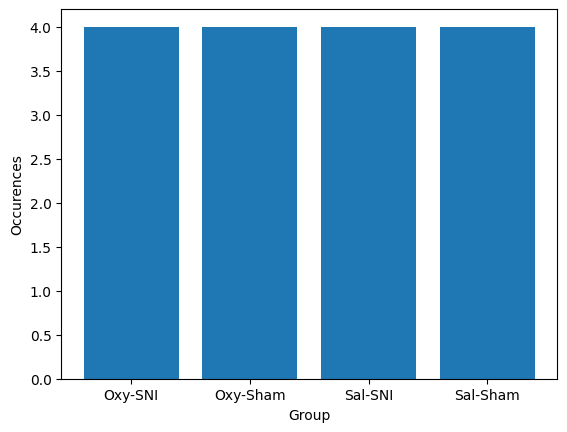

In [11]:
combinations = data.groupby(['Condition', 'Genotype']).size().reset_index(name='Multiplicity')
combinations['Group'] = combinations['Condition'] + '-' + combinations['Genotype']

plt.bar(combinations['Group'], combinations['Multiplicity'])

plt.xlabel('Group')
plt.ylabel('Occurences')

plt.show()



They were so kind to also provide you with the information of the number of bases per run, so that you can know how much space the data will take on your Cluster.<br>
Add a new column to your fancy table with this information (base_counts.csv) and sort your dataframe according to this information and the condition.

Then select the 2 smallest runs from your dataset and download them from SRA (maybe an nf-core pipeline can help here?...)

In [12]:
base_counts = pd.read_csv('base_counts.csv')
sorted_data = data
sorted_data['Bases'] = base_counts['Bases']
sorted_data = sorted_data.groupby('Condition').apply(lambda x: x.sort_values('Bases')).reset_index(drop=True)
sorted_data

/var/folders/lz/f3d23yln2g90561bcvk0850h0000gp/T/ipykernel_32783/3021940219.py:4: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  sorted_data = sorted_data.groupby('Condition').apply(lambda x: x.sort_values('Bases')).reset_index(drop=True)


,Sample,Condition,Genotype,Bases
0,SRR23195516,Oxy,SNI,6203117700
1,SRR23195511,Oxy,Sham,6456390900
2,SRR23195517,Oxy,SNI,6863840400
3,SRR23195508,Oxy,SNI,6927786900
4,SRR23195519,Oxy,Sham,6996050100
5,SRR23195509,Oxy,SNI,7003550100
6,SRR23195514,Oxy,Sham,7226808600
7,SRR23195506,Oxy,Sham,7859530800
8,SRR23195505,Sal,SNI,6922564500
9,SRR23195510,Sal,SNI,7377388500


In [13]:
sample_sheet = sorted_data['Sample'][:2]
sample_sheet.to_csv('sample_sheet.csv', index=False, header=False)

In [1]:
!nextflow run nf-core/fetchngs -profile test,docker --input sample_sheet.csv --outdir test_sheet

Nextflow 24.04.4 is available - Please consider updating your version to it
N E X T F L O W  ~  version 23.10.0
Launching `https://github.com/nf-core/fetchngs` [big_goldberg] DSL2 - revision: 8ec2d934f9 [master]
WARN: Access to undefined parameter `monochromeLogs` -- Initialise it to a default value eg. `params.monochromeLogs = some_value`


------------------------------------------------------
                                        ,--./,-.
        ___     __   __   __   ___     /,-._.--~'
  |\ | |__  __ /  ` /  \ |__) |__         }  {
  | \| |       \__, \__/ |  \ |___     \`-._,-`-,
                                        `._,._,'
  nf-core/fetchngs v1.12.0-g8ec2d93
------------------------------------------------------
Core Nextflow options
  revision                  : master
  runName                   : big_goldberg
  containerEngine           : docker
  launchDir                 : /Users/jansteiger/Documents/Comp_workflows/day2
  workDir                   : /Users/jansteiger/

While your files are downloading, get back to the paper and explain how you would try to reproduce the analysis.<br>
When you are done with this shout, so we can discuss the different ideas.

Group the data by the respective subgroup and compare expression of DEGs.

In day_2_part2